In [53]:
from zdm import iteration as it
from zdm.craco import loading
from zdm import misc_functions
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams['font.size'] = 14

In [54]:
frb_names = ["181112", 
             "190611", 
             "190711", 
             "191228", 
             "200430", 
             "210117", 
             "210320", 
             "210407", 
             "210912", 
             "220501", 
             "220725", 
             "230526", 
             "230708"]
dir = "../llsum_files/"
H0s = np.load(dir + "H0s.npy")
single_survey = np.load(dir + "CRAFT_ICS.npy")

In [55]:
def load_files(dir):
    llsums = []
    llsums_exact = []
    llsum_total = np.zeros(len(H0s), dtype=float)
    llsum_total_exact = np.zeros(len(H0s), dtype=float)

    for frb in frb_names:
        if os.path.exists(dir+frb+".npy"):
            # print(frb)
            llsum = np.load(dir+frb+".npy")
            llsums.append(llsum)
            llsum_total += llsum

        if os.path.exists(dir+frb+"_exact.npy"):
            llsum_exact = np.load(dir+frb+"_exact.npy")
            llsums_exact.append(llsum_exact)
            llsum_total_exact += llsum_exact
    
    return llsums, llsum_total, llsums_exact, llsum_total_exact

In [56]:
llsums, llsum_total, _, _ = load_files("../llsum_files_CRAFT/")
_, _, llsums_exact, llsum_total_exact = load_files("../llsum_files/")

In [57]:
H0_peak = H0s[np.argmax(single_survey)]
H0_peak_quad = H0s[np.argmax(llsum_total)]
H0_peak_exact = H0s[np.argmax(llsum_total_exact)]

i=3
H0_peak_quad_2 = H0s[np.argmax(llsum_total - llsums[i])]
H0_peak_exact_2 = H0s[np.argmax(llsum_total_exact - llsums_exact[i])]

print("Maximum likelihood H0: " + str(H0_peak))
print("Maximum likelihood quad H0: " + str(H0_peak_quad))
print("Maximum likelihood exact H0: " + str(H0_peak_exact))
print("Difference: " + str(H0_peak_exact - H0_peak))

print("Maximum likelihood quad H0 without " + frb_names[i] + ": " + str(H0_peak_quad_2))
print("Maximum likelihood exact H0 without " + frb_names[i] + ": " + str(H0_peak_exact_2))
print("Difference: " + str(H0_peak_exact_2 - H0_peak_quad_2))

Maximum likelihood H0: 71.71342685370742
Maximum likelihood quad H0: 71.73346693386773
Maximum likelihood exact H0: 72.01402805611222
Difference: 0.30060120240480614
Maximum likelihood quad H0 without 191228: 72.05410821643287
Maximum likelihood exact H0 without 191228: 71.7935871743487
Difference: -0.2605210420841644


(68.0, 75.0)

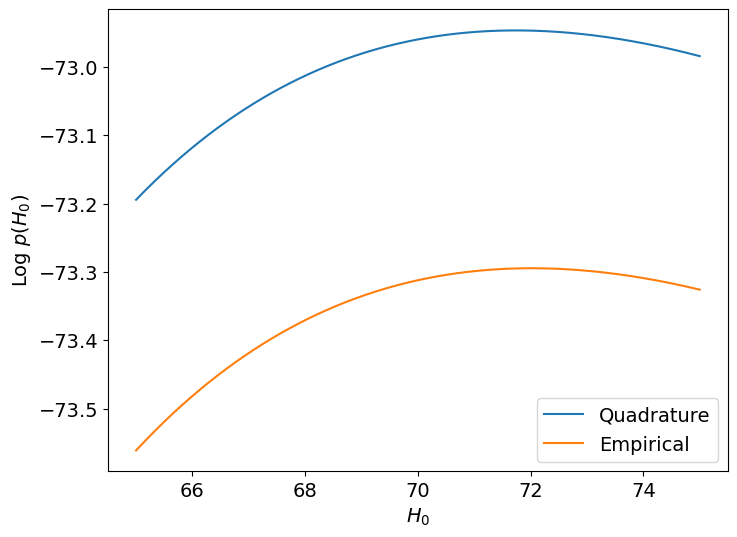

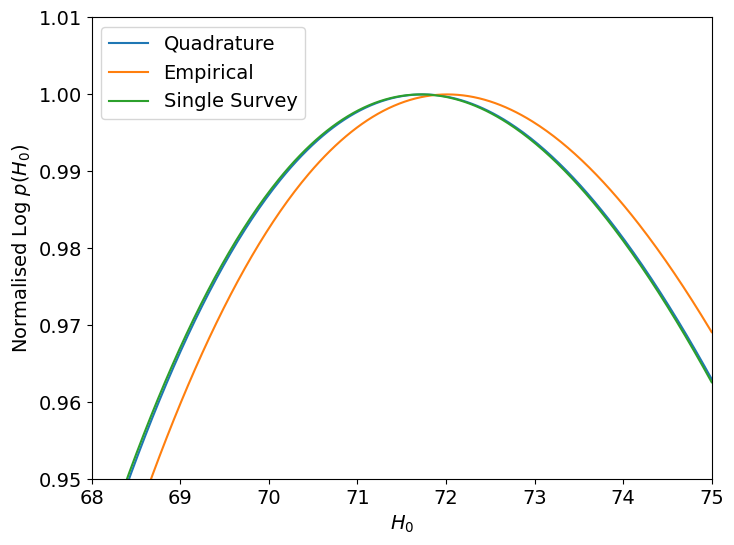

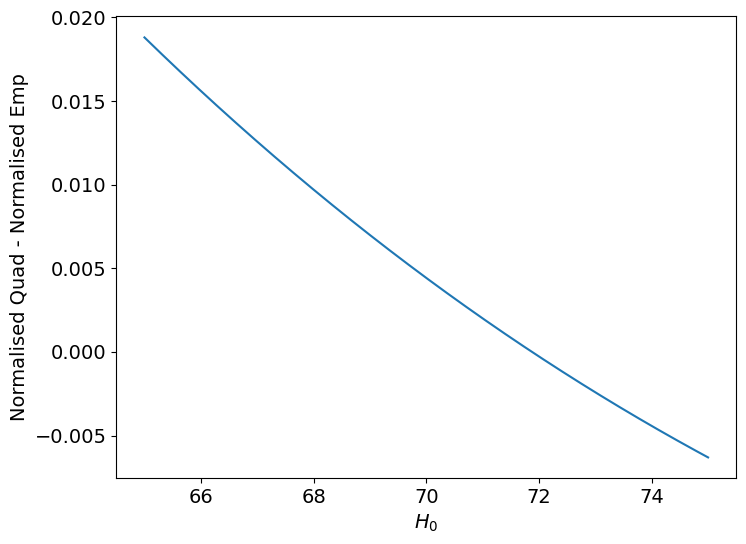

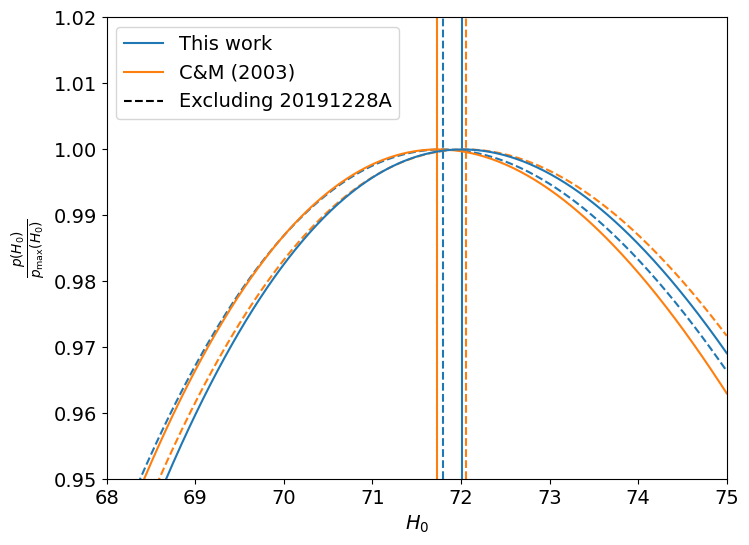

In [58]:
fig, axs = plt.subplots(1,1)
axs.plot(H0s, llsum_total, label="Quadrature")
axs.plot(H0s, llsum_total_exact, label="Empirical")
axs.set_xlabel(r'$H_0$')
axs.set_ylabel(r'Log $p(H_0)$')
axs.legend()

fig, axs = plt.subplots(1,1)
axs.plot(H0s, np.exp(llsum_total - np.max(llsum_total)), label="Quadrature")
axs.plot(H0s, np.exp(llsum_total_exact - np.max(llsum_total_exact)), label="Empirical")
axs.plot(H0s, np.exp(single_survey - np.max(single_survey)), label="Single Survey")
# axs.plot(H0s, np.exp(llsum_total - llsums[i] - np.max(llsum_total- llsums[i])), label="Quadrature excluding " + frb_names[i])
# axs.plot(H0s, np.exp(llsum_total_exact - llsums_exact[i] - np.max(llsum_total_exact- llsums_exact[i])), label="Empirical excluding " + frb_names[i])
axs.set_xlabel(r'$H_0$')
axs.set_ylabel(r'Normalised Log $p(H_0)$')
axs.legend(loc='upper left')
# axs.set_ylim(bottom=-0.02, top=0.002)
axs.set_ylim(bottom=0.95, top=1.01)
axs.set_xlim(left=68, right=75)

fig, axs = plt.subplots(1,1)
axs.plot(H0s, (llsum_total - np.max(llsum_total)) - (llsum_total_exact- np.max(llsum_total_exact)))
axs.set_xlabel(r'$H_0$')
axs.set_ylabel(r'Normalised Quad - Normalised Emp')

fig, ax = plt.subplots(1,1)

line, = ax.plot(H0s, np.exp(llsum_total_exact - np.max(llsum_total_exact)), zorder=10, label="This work")
ax.plot(H0s, np.exp(llsum_total_exact - llsums_exact[i] - np.max(llsum_total_exact- llsums_exact[i])), c = line.get_color(), ls='--')
ax.axvline(H0s[np.argmax(llsum_total_exact)], c = line.get_color())
ax.axvline(H0s[np.argmax(llsum_total_exact - llsums_exact[i])], c = line.get_color(), ls='--')

line, = ax.plot(H0s, np.exp(llsum_total - np.max(llsum_total)), label="C&M (2003)")
ax.plot(H0s, np.exp(llsum_total - llsums[i] - np.max(llsum_total- llsums[i])), c = line.get_color(), ls='--')
ax.axvline(H0s[np.argmax(llsum_total)], c = line.get_color())
ax.axvline(H0s[np.argmax(llsum_total - llsums[i])], c = line.get_color(), ls='--')

ax.plot([], [], ls='--', c='k', label='Excluding 20191228A')

ax.set_xlabel(r'$H_0$')
ax.set_ylabel(r'$\frac{p(H_0)}{p_{\mathrm{max}}(H_0)}$')
ax.legend(loc='upper left')
# axs[1].set_ylim(bottom=-0.02, top=0.002)
ax.set_ylim(bottom=0.95, top=1.02)
ax.set_xlim(left=68, right=75)

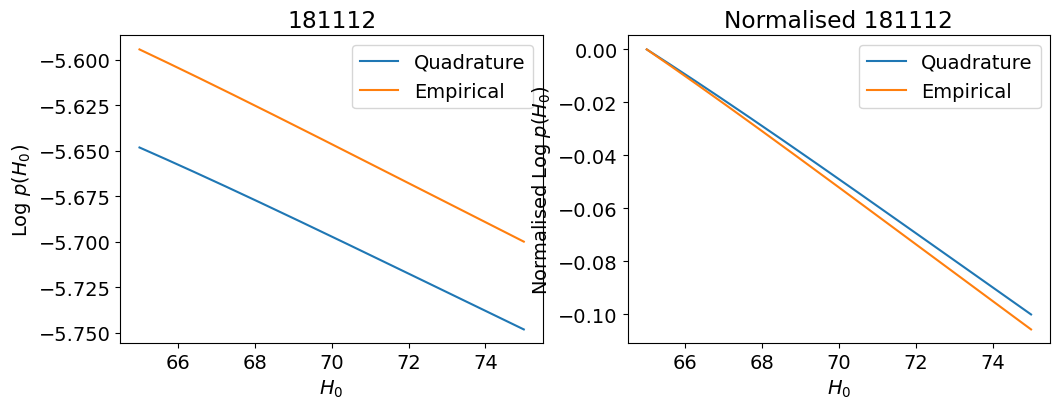

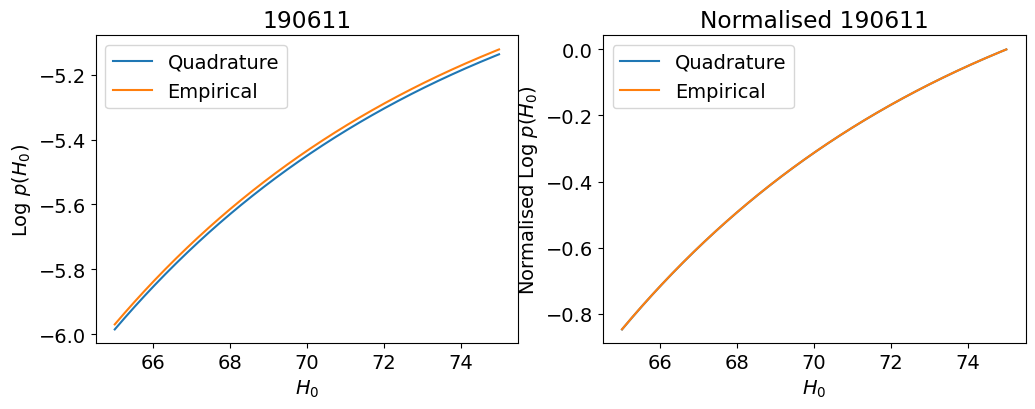

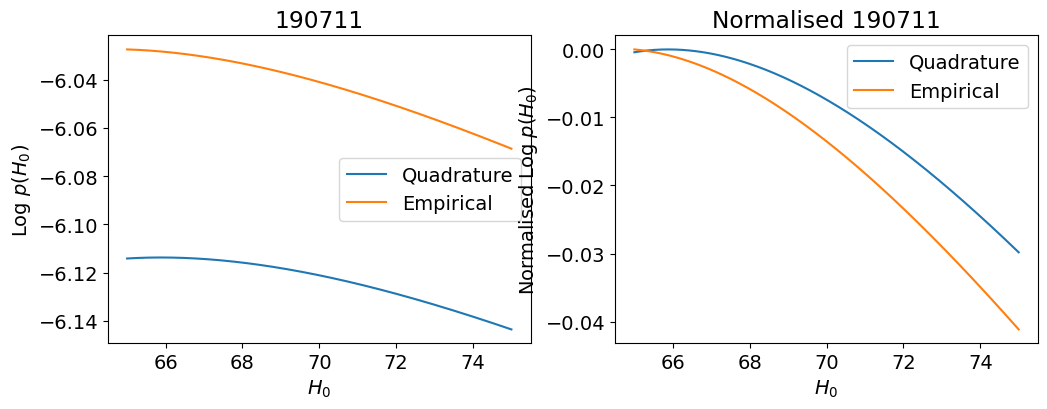

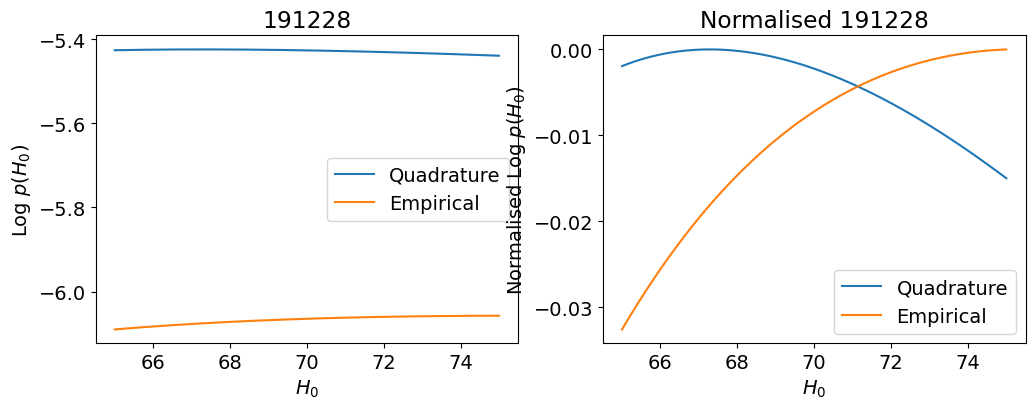

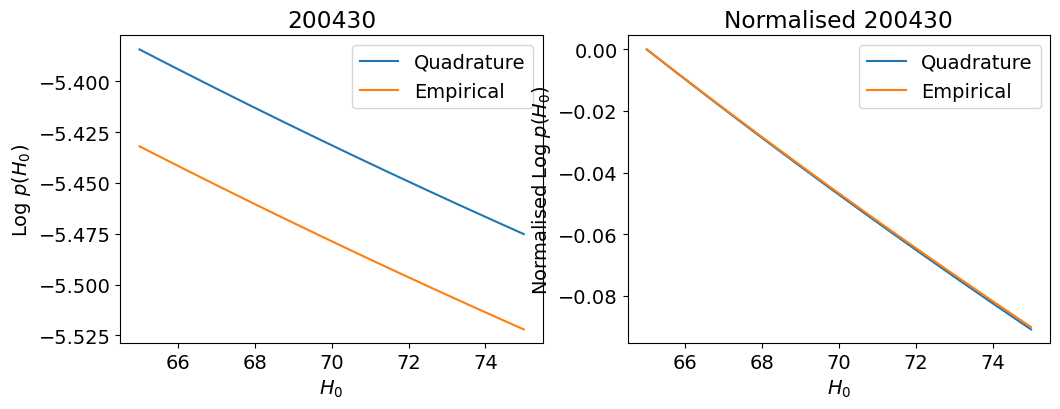

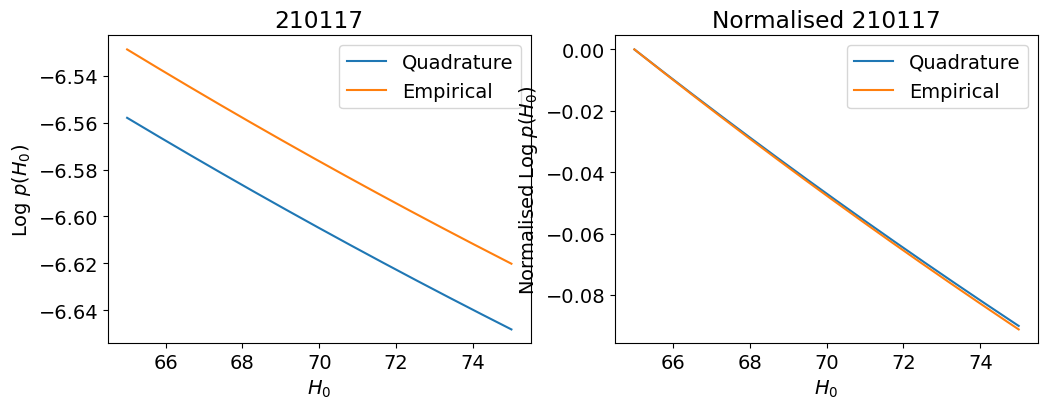

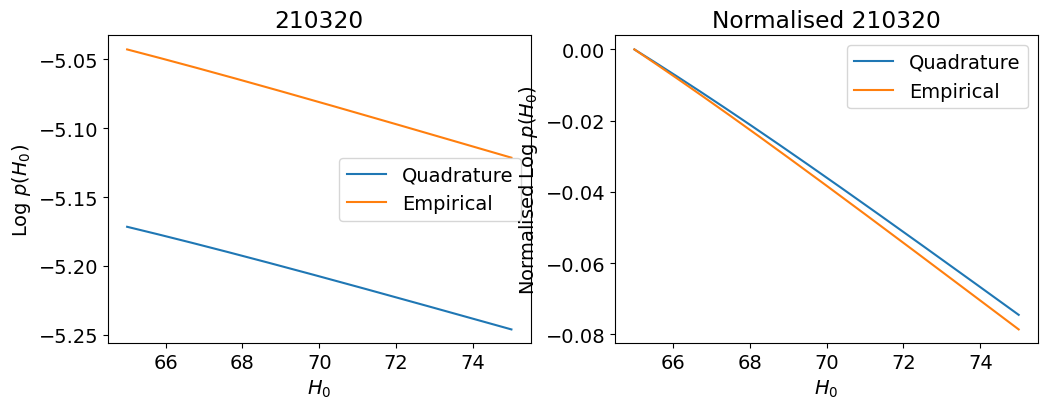

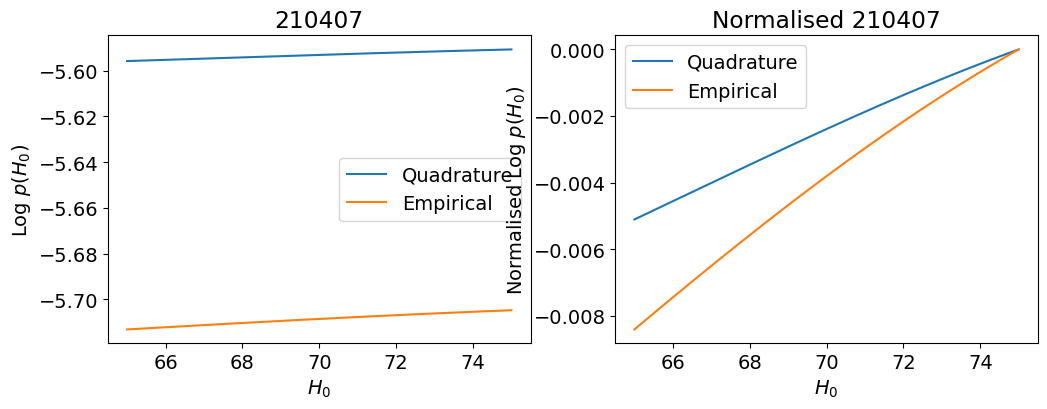

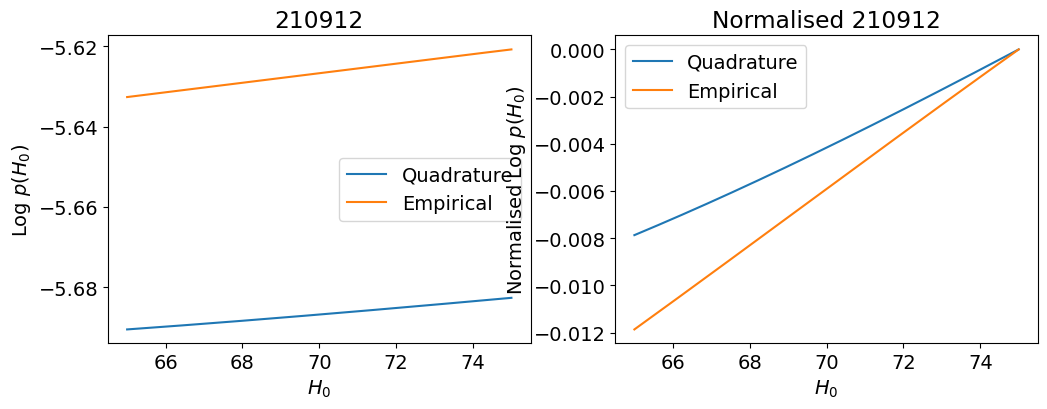

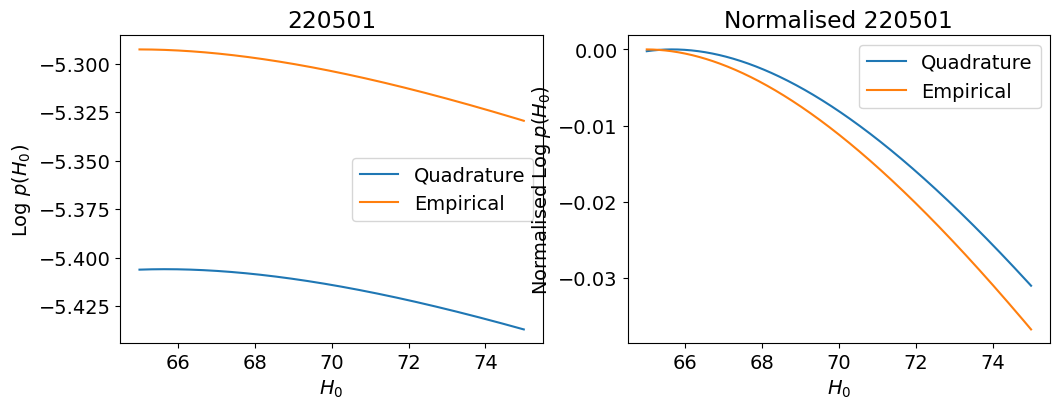

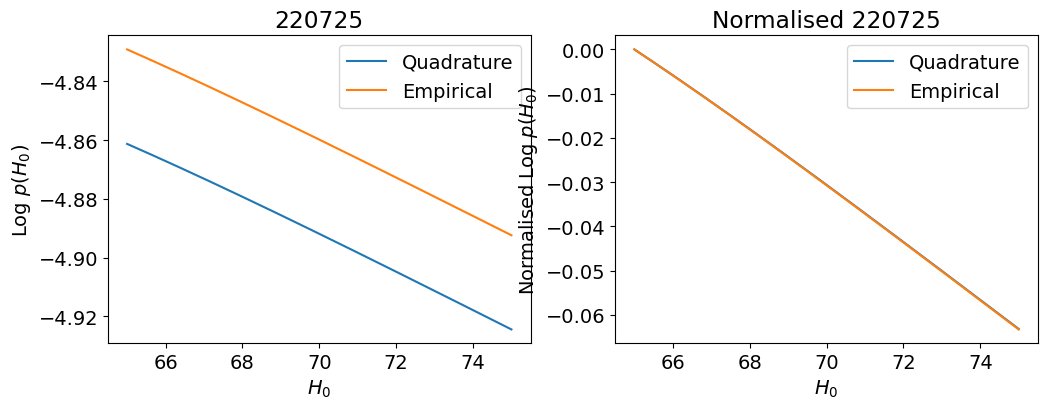

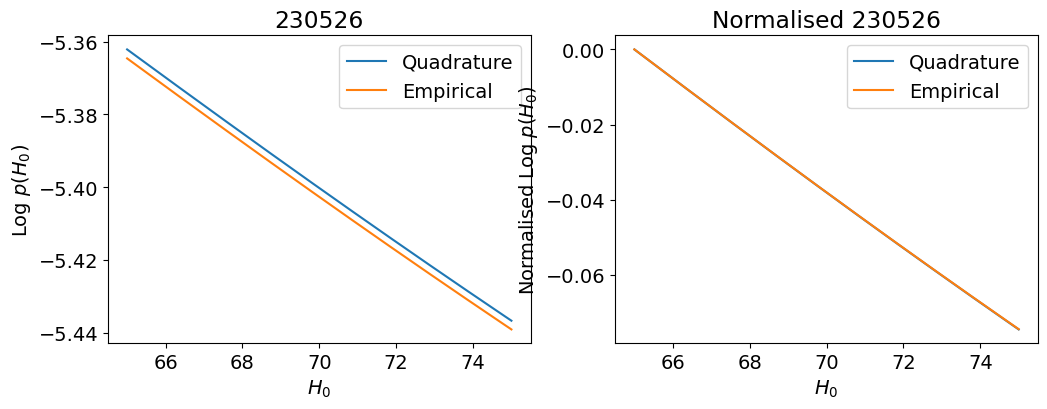

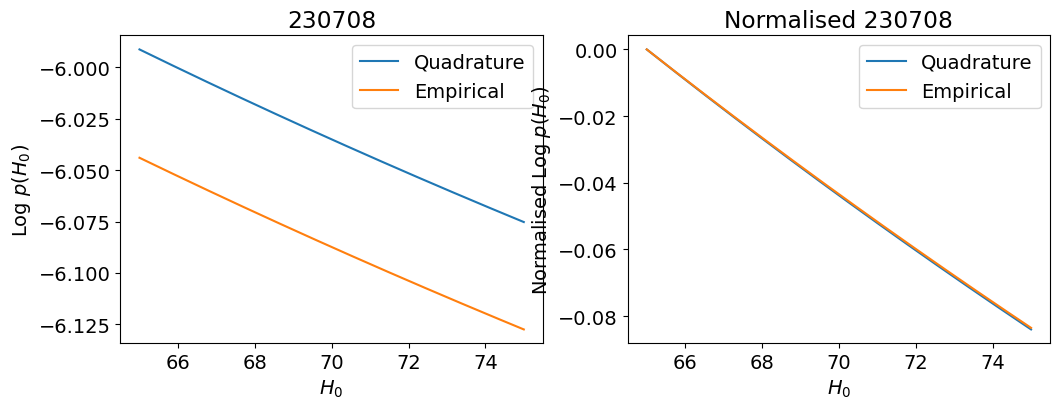

In [59]:
for i in range(len(llsums)):
    frb = frb_names[i]

    fig, axs = plt.subplots(1,2,figsize=(12,4))
    axs[0].plot(H0s, llsums[i], label="Quadrature")
    axs[0].plot(H0s, llsums_exact[i], label="Empirical")
    axs[0].set_xlabel(r'$H_0$')
    axs[0].set_ylabel(r'Log $p(H_0)$')
    axs[0].set_title(frb)
    axs[0].legend()

    axs[1].plot(H0s, llsums[i] - np.max(llsums[i]), label="Quadrature")
    axs[1].plot(H0s, llsums_exact[i] - np.max(llsums_exact[i]), label="Empirical")
    axs[1].set_xlabel(r'$H_0$')
    axs[1].set_ylabel(r'Normalised Log $p(H_0)$')
    axs[1].set_title("Normalised " + frb)
    axs[1].legend()